<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Python_0607_%EC%9D%B4%EB%AF%B8%EC%A7%80%ED%9A%8C%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

_file = files.upload()

Saving images.png to images.png


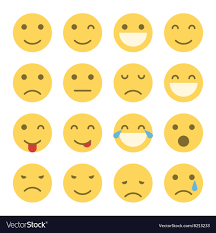

In [ ]:
img = cv2.imread("images.png")
height, width, channel = img.shape
cv2_imshow(img)

#### 1. 상하대칭

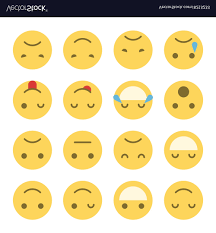

In [ ]:
turn_y = np.zeros(shape=(height, width, channel), dtype=np.uint8)

for y in range(height):
  y1 = (height-1)-y
  turn_y[y] = img[y1]

cv2_imshow(turn_y)

#### 2.좌우대칭

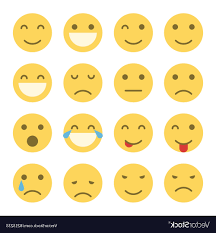

In [ ]:
turn_x = np.zeros(shape=(height, width, channel), dtype=np.uint8)

for y in range(height):
  for x in range(width):
    x1 = (width-1) - x
    turn_x[y][x]=img[y][x1]

cv2_imshow(turn_x)

#### 3. 시계방향 90도 회전

In [ ]:
def turn_img(_img):
  _height, _width, _channel = _img.shape
  t_h = _width
  t_w = _height
  t_ch = _channel
  turn_img = np.zeros(shape=(t_h, t_w, t_ch), dtype="uint8")

  for y in range(t_h):
    for x in range(t_w):
      x1 = (t_w-1)-x
      turn_img[y][x] = img[x1][y]
      print("x:{}, y:{}".format(x, y))

  return turn_img

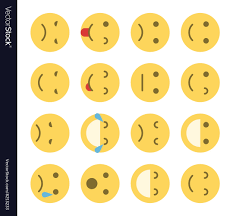

In [ ]:
turn_90 = turn_img(img)
cv2_imshow(turn_90)

In [ ]:
turn_180 = turn_img(turn_90)
cv2_imshow(turn_180)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
x:184, y:192
x:185, y:192
x:186, y:192
x:187, y:192
x:188, y:192
x:189, y:192
x:190, y:192
x:191, y:192
x:192, y:192
x:193, y:192
x:194, y:192
x:195, y:192
x:196, y:192
x:197, y:192
x:198, y:192
x:199, y:192
x:200, y:192
x:201, y:192
x:202, y:192
x:203, y:192
x:204, y:192
x:205, y:192
x:206, y:192
x:207, y:192
x:208, y:192
x:209, y:192
x:210, y:192
x:211, y:192
x:212, y:192
x:213, y:192
x:214, y:192
x:215, y:192
x:0, y:193
x:1, y:193
x:2, y:193
x:3, y:193
x:4, y:193
x:5, y:193
x:6, y:193
x:7, y:193
x:8, y:193
x:9, y:193
x:10, y:193
x:11, y:193
x:12, y:193
x:13, y:193
x:14, y:193
x:15, y:193
x:16, y:193
x:17, y:193
x:18, y:193
x:19, y:193
x:20, y:193
x:21, y:193
x:22, y:193
x:23, y:193
x:24, y:193
x:25, y:193
x:26, y:193
x:27, y:193
x:28, y:193
x:29, y:193
x:30, y:193
x:31, y:193
x:32, y:193
x:33, y:193
x:34, y:193
x:35, y:193
x:36, y:193
x:37, y:193
x:38, y:193
x:39, y:193
x:40, y:193
x:41, y:193
x:42, y:193
x:43, y:193
x:44, y:193
x:45, y:193
x:46, 

IndexError: ignored

#### 4. 임의의 각도로 회전

In [ ]:
def rotate_img(_img, _degree):
  height, width, channel = _img.shape
  _radian = np.radians(_degree)

  r_img = np.zeros(shape=_img.shape, dtype=np.uint8)

  for y in range(height):
    for x in range(width):
      r_x = int((x-width/2)*np.cos(_radian) - (y-height/2)*np.sin(_radian) + (x-width/2))
      r_y = int((x-width/2)*np.sin(_radian) + (y-height/2)*np.cos(_radian) + (y-height/2))

      if 0 <= r_y < height:
        if 0<= r_x <width:
          r_img[r_y][r_x] = img[y][x]
  
  return r_img


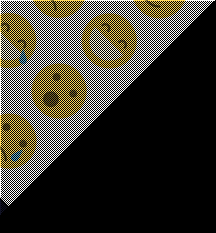

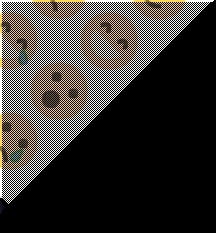

In [ ]:
r_img = rotate_img(img, 90)
cv2_imshow(r_img)
r_img = cv2.medianBlur(r_img, 3)
cv2_imshow(r_img)

#### 5. 필터 적용

In [ ]:
def blur_img(_img, level_y, level_x):
  height, width, channel = _img.shape
  b_img = np.zeros(shape=_img.shape, dtype=np.uint8)

  for y in range(height):
    for x in range(width):
      count = 0
      sum = [0, 0, 0]
      for f_y in range(y-level_y%2, y+level_y%2+1):
        if f_y < 0 or f_y > height-1 :
          continue
        for f_x in range(x-level_x%2, x+level_x%2+1):
          if f_x < 0 or f_x > width - 1:
            continue
          
          sum += _img[f_y][f_x][:]
          count += 1
        
        b_img[y][x][:] = [int(i/count) for i in sum]

  return b_img


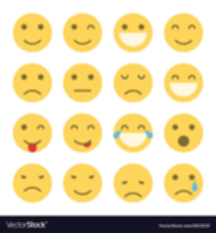

In [ ]:
b_img = blur_img(img, 1, 15)
cv2_imshow(b_img)

In [ ]:
def blur_img(_img, level_y, level_x):
  height, width, channel = _img.shape
  b_img = np.zeros(shape=_img.shape, dtype=np.uint8)

  for y in range(height):
    for x in range(width):
      count = 0
      sum = [0, 0, 0]
      for f_y in range(y-level_y%2, y+level_y%2+1):
        if f_y < 0 or f_y > height-1 :
          continue
        for f_x in range(x-level_x%2, x+level_x%2+1):
          if f_x < 0 or f_x > width - 1:
            continue          
          sum += _img[f_y][f_x][:]
          count += 1
        
        b_img[y][x][:] = [int(i/count) for i in sum]

  return b_img
